# DECISION TREE

In [1]:
import pandas as pd
import numpy as np
#import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier


In [2]:
zooset=pd.read_csv("zoo.csv",header=None)

In [3]:
print(zooset)

           0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
0    aardvark   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   
1    antelope   1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1   
2        bass   0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0   
3        bear   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   
4        boar   1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   
5     buffalo   1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1   
6        calf   1   0   0   1   0   0   0   1   1   1   0   0   4   1   1   1   
7        carp   0   0   1   0   0   1   0   1   1   0   0   1   0   1   1   0   
8     catfish   0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0   
9        cavy   1   0   0   1   0   0   0   1   1   1   0   0   4   0   1   0   
10    cheetah   1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   
11    chicken   0   1   1   

In [4]:
zooset.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
y=zooset[:][17]
print(y)

0      1
1      1
2      4
3      1
4      1
5      1
6      1
7      4
8      4
9      1
10     1
11     2
12     4
13     7
14     7
15     7
16     2
17     1
18     4
19     1
20     2
21     2
22     1
23     2
24     6
25     5
26     5
27     1
28     1
29     1
      ..
71     2
72     7
73     4
74     1
75     1
76     3
77     7
78     2
79     2
80     3
81     7
82     4
83     2
84     1
85     7
86     4
87     2
88     6
89     5
90     3
91     3
92     4
93     1
94     1
95     2
96     1
97     6
98     1
99     7
100    2
Name: 17, Length: 101, dtype: int64


In [6]:
X=zooset.iloc[:,1:17]

print(X)

     1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0     1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1
1     1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1
2     0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0
3     1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1
4     1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1
5     1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1
6     1   0   0   1   0   0   0   1   1   1   0   0   4   1   1   1
7     0   0   1   0   0   1   0   1   1   0   0   1   0   1   1   0
8     0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0
9     1   0   0   1   0   0   0   1   1   1   0   0   4   0   1   0
10    1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1
11    0   1   1   0   1   0   0   0   1   1   0   0   2   1   1   0
12    0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0
13    0   0   1   0   0   0   1   0   0   0   0 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
fig = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[12  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.96        26
   macro avg       0.79      0.86      0.81        26
weighted avg       0.94      0.96      0.95        26



/home/exam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/exam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9615384615384616


In [18]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data=StringIO()
# graph=export_graphviz(clf,out_file=dot_data,filled=True,rounded=True);
# #fig.savefig('imagename.png')
# graph.write_png('diabetes.png')
# Image(graph.create_png())

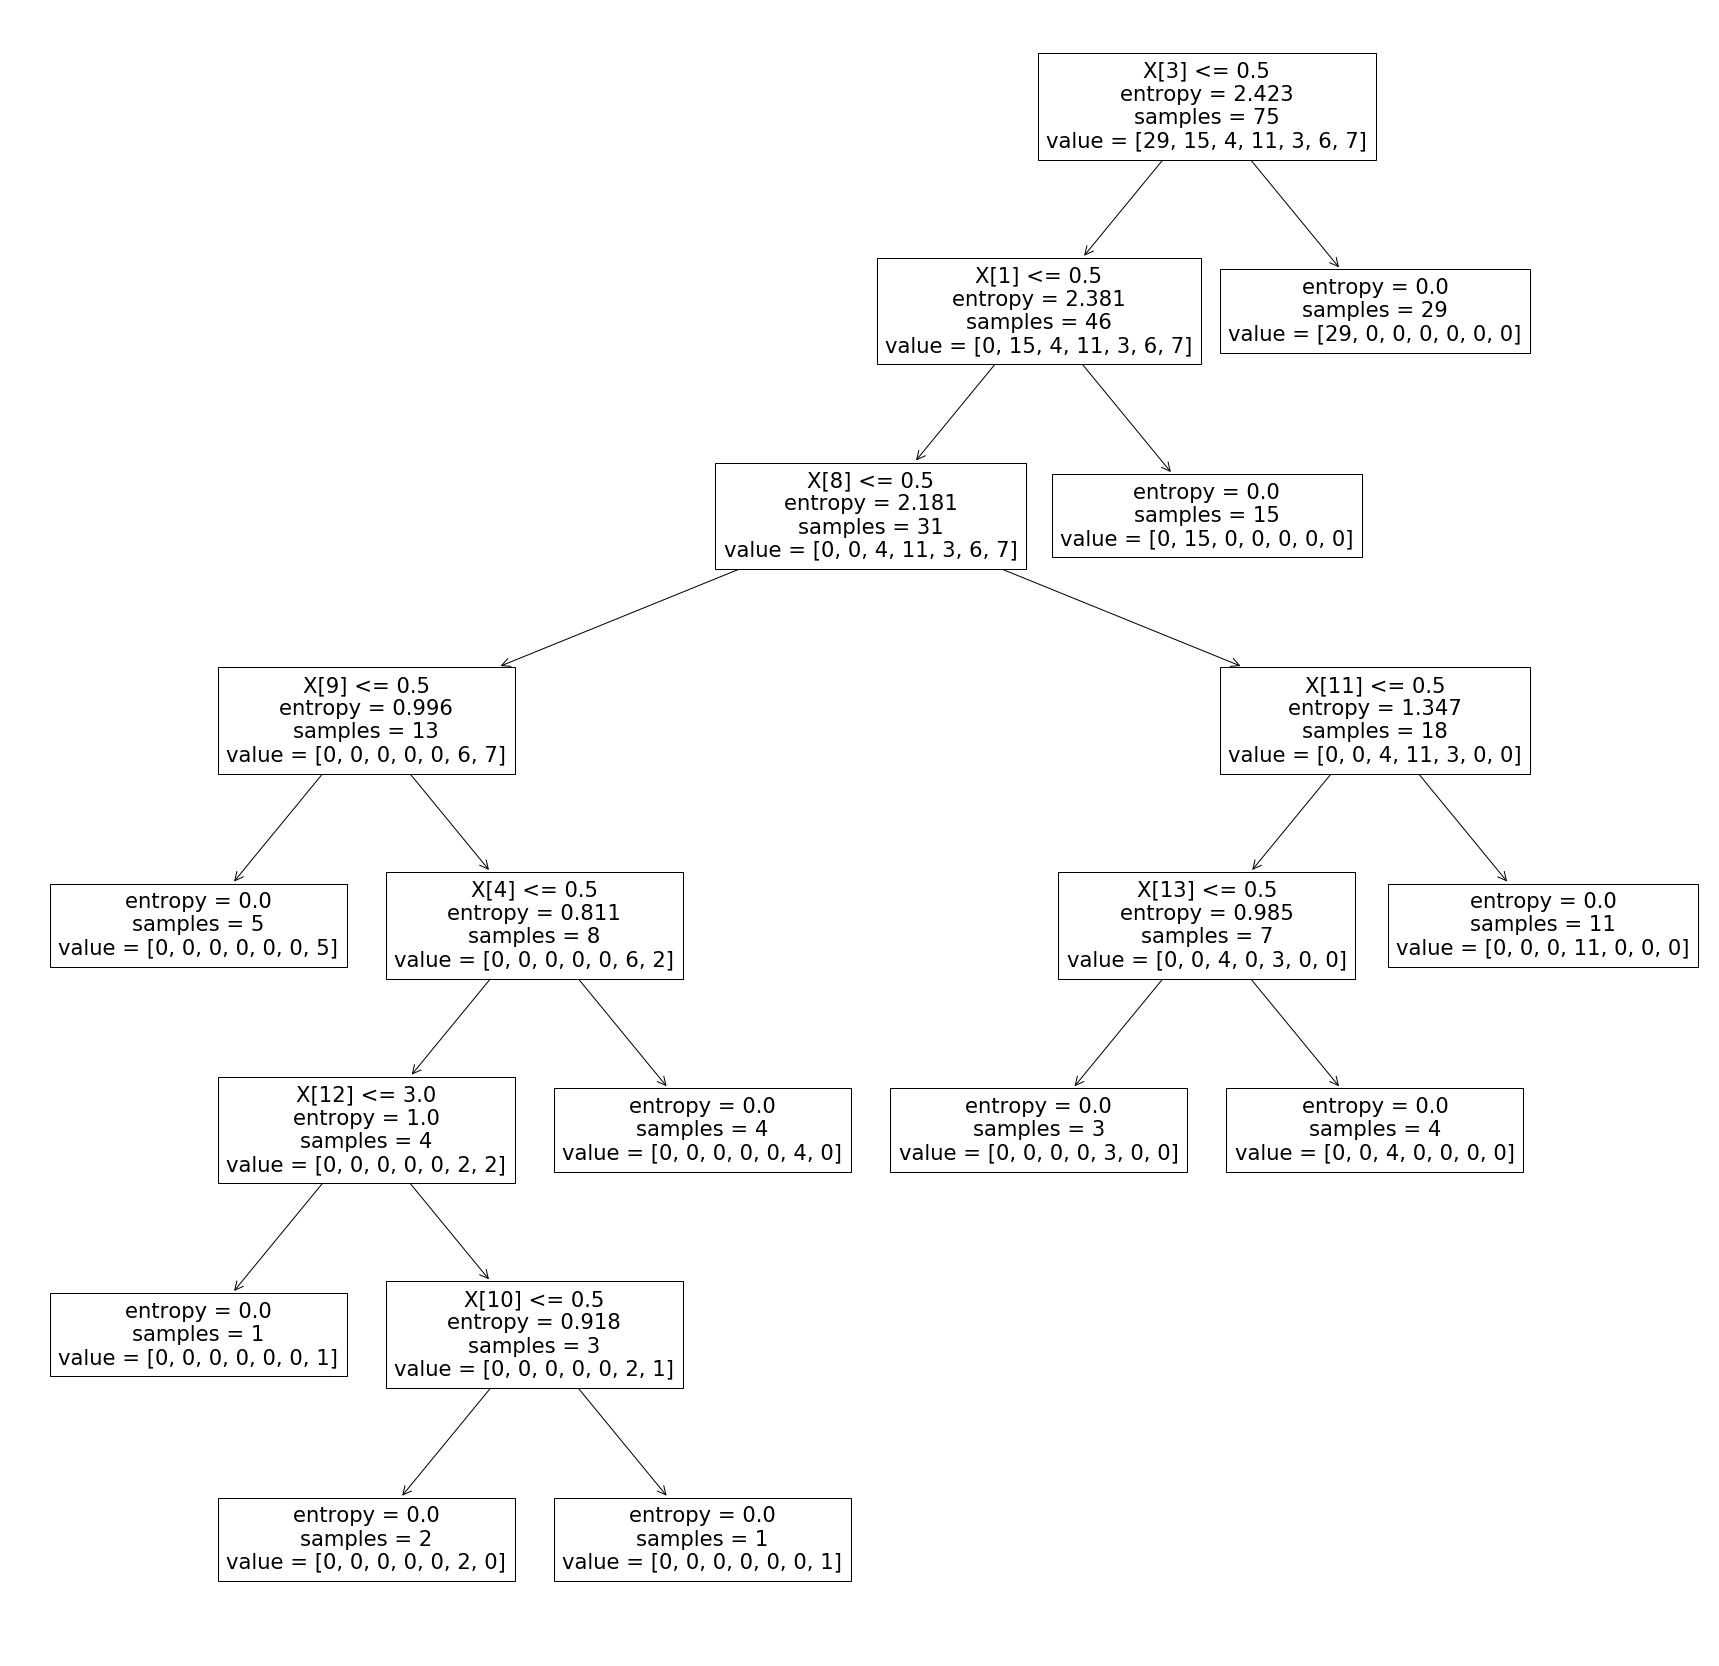

In [19]:


#from sklearn.model_selection import train_test
from sklearn import tree

#fig=clf.fit(X_train,y_train)
plt.figure(figsize=(30,30))
#1clf.predict(X_text)
tree.plot_tree(fig)
plt.show()

In [12]:
# from sklearn.tree import DecisionTreeClassifier
# clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# # fit the model
# clf_gini.fit(X_train, y_train)

# plt.figure(figsize=(12,8))

# from sklearn import tree

# tree.plot_tree(clf_gini.fit(X_train, y_train)) 


